In [290]:
Sys.setlocale("LC_ALL", 'Persian')

[1] "LC_COLLATE=Persian_Iran.1256;LC_CTYPE=Persian_Iran.1256;LC_MONETARY=Persian_Iran.1256;LC_NUMERIC=C;LC_TIME=Persian_Iran.1256"

In [291]:
options(scipen=999)

In [292]:
library(ggplot2)
library(ggridges)
library(viridis)
library(hrbrthemes)
library(corrgram)
library(ellipse)
library(RColorBrewer)
library(dplyr)
library(treemapify)
library(fastDummies)
library(sf)
library(reshape2)
library(rgdal)
library(rgeos)
library(ggrepel)
library(tidyverse)

In [293]:
data = readxl::read_excel(path = 'E:\\Term 7\\Data Mining\\Ex1\\Iran_Maskan_koll9904.xlsx')

In [294]:
head(data)

کد قرارداد,نوع قرارداد,استان,شهرستان,نوع ملک,منطقه شهرداری,نوع کاربری,مساحت,درصد,قیمت,قیمت یک مترمربع,عمر بنا,نوع اسکلت,تاریخ ثبت قرارداد,شش رقم نخست کد پستی
19136381,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,83.00,100,3000000,36144.58,15,فلزي,1399/04/14,456179
19140513,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,90.00,100,1080000,12000.00,9,فلزي,1399/04/15,456615
19192568,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,49.00,100,10000000,204081.63,10,بتوني,1399/04/23,456173
19202902,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,80.92,100,3240000,40039.55,9,فلزي,1399/04/24,456194
19203171,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,80.00,100,750000,9375.00,10,بتوني,1399/04/24,456618
19052240,مبايعه نامه,مرکزي,اراك,دستگاه آپارتمان,NA,مسکوني,100.00,100,5500000,55000.00,0,بتوني,1399/04/01,381333


In [295]:
summary(data)

  کد قرارداد        نوع قرارداد           استان             شهرستان         
 Length:43133       Length:43133       Length:43133       Length:43133      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   نوع ملک          منطقه شهرداري     نوع کاربري            مساحت          
 Length:43133       Min.   : 1.000   Length:43133       Min.   :     1.00  
 Class :character   1st Qu.: 3.000   Class :character   1st Qu.:    66.81  
 Mode  :character   Median : 6.000   Mode  :character   Median :    85.00  
                    Mean   : 7.221                      Mean   :   251.42  
    

In [296]:
str(data)

tibble [43,133 x 15] (S3: tbl_df/tbl/data.frame)
 $ کد قرارداد         : chr [1:43133] "19136381" "19140513" "19192568" "19202902" ...
 $ نوع قرارداد        : chr [1:43133] "مبايعه نامه" "مبايعه نامه" "مبايعه نامه" "مبايعه نامه" ...
 $ استان              : chr [1:43133] "زنجان" "زنجان" "زنجان" "زنجان" ...
 $ شهرستان            : chr [1:43133] "ابهر" "ابهر" "ابهر" "ابهر" ...
 $ نوع ملک            : chr [1:43133] "دستگاه آپارتمان" "دستگاه آپارتمان" "دستگاه آپارتمان" "دستگاه آپارتمان" ...
 $ منطقه شهرداري      : num [1:43133] NA NA NA NA NA NA NA NA NA 4 ...
 $ نوع کاربري         : chr [1:43133] "مسکوني" "مسکوني" "مسکوني" "مسکوني" ...
 $ مساحت              : num [1:43133] 83 90 49 80.9 80 ...
 $ درصد               : chr [1:43133] "100" "100" "100" "100" ...
 $ قيمت               : num [1:43133] 3000000 1080000 10000000 3240000 750000 ...
 $ قيمت يک مترمربع    : chr [1:43133] "36144.58" "12000.00" "204081.63" "40039.55" ...
 $ عمر بنا            : num [1:43133] 15 9 10 9 10 0 1 6 19 0 ...


In [297]:
names(data)[1] = 'contrat_number'
names(data)[2] = 'contract_type'
names(data)[3] = 'state'
names(data)[4] = 'city'
names(data)[5] = 'property_type'
names(data)[6] = 'district_number'
names(data)[7] = 'usage_type'
names(data)[8] = 'area'
names(data)[9] = 'percentage'
names(data)[10] = 'price'
names(data)[11] = 'price_per_square'
names(data)[12] = 'building_age'
names(data)[13] = 'skeleton_type'
names(data)[14] = 'contract_date'
names(data)[15] = 'postal_code'
data = data[!is.na(data$contrat_number),]
data$price = as.numeric(data$price) / 10000
data$price_per_square = as.numeric(data$price_per_square) / 10000

In [298]:
data

contrat_number,contract_type,state,city,property_type,district_number,usage_type,area,percentage,price,price_per_square,building_age,skeleton_type,contract_date,postal_code
19136381,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,83.00,100,300.0,3.614458,15,فلزي,1399/04/14,456179
19140513,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,90.00,100,108.0,1.200000,9,فلزي,1399/04/15,456615
19192568,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,49.00,100,1000.0,20.408163,10,بتوني,1399/04/23,456173
19202902,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,80.92,100,324.0,4.003955,9,فلزي,1399/04/24,456194
19203171,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,80.00,100,75.0,0.937500,10,بتوني,1399/04/24,456618
19052240,مبايعه نامه,مرکزي,اراك,دستگاه آپارتمان,NA,مسکوني,100.00,100,550.0,5.500000,0,بتوني,1399/04/01,381333
19052937,مبايعه نامه,مرکزي,اراك,دستگاه آپارتمان,NA,مسکوني,112.00,100,1100.0,9.821429,1,فلزي,1399/04/01,381869
19053990,مبايعه نامه,مرکزي,اراك,دستگاه آپارتمان,NA,مسکوني,148.48,100,1065.0,7.172683,6,بتوني و فلزي,1399/04/01,385174
19056722,مبايعه نامه,مرکزي,اراك,دستگاه آپارتمان,NA,مسکوني,50.00,100,190.0,3.800000,19,بدون اسکلت,1399/04/02,381788
19057024,مبايعه نامه,مرکزي,اراك,دستگاه آپارتمان,4,مسکوني,74.50,100,840.0,11.275168,0,بتوني,1399/04/02,381414


Reading layer `IRN_adm1' from data source `E:\Term 7\Data Mining\Ex1\adm' using driver `ESRI Shapefile'
Simple feature collection with 31 features and 9 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: 44.04726 ymin: 25.05875 xmax: 63.31746 ymax: 39.77722
geographic CRS: WGS 84
OGR data source with driver: ESRI Shapefile 
Source: "E:\Term 7\Data Mining\Ex1\adm", layer: "IRN_adm1"
with 31 features
It has 9 fields
Integer64 fields read as strings:  ID_0 ID_1 


Warning message in st_centroid.sf(.):
"st_centroid assumes attributes are constant over geometries of x"Warning message in st_centroid.sfc(st_geometry(x), of_largest_polygon = of_largest_polygon):
"st_centroid does not give correct centroids for longitude/latitude data"Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
"st_point_on_surface may not give correct results for longitude/latitude data"

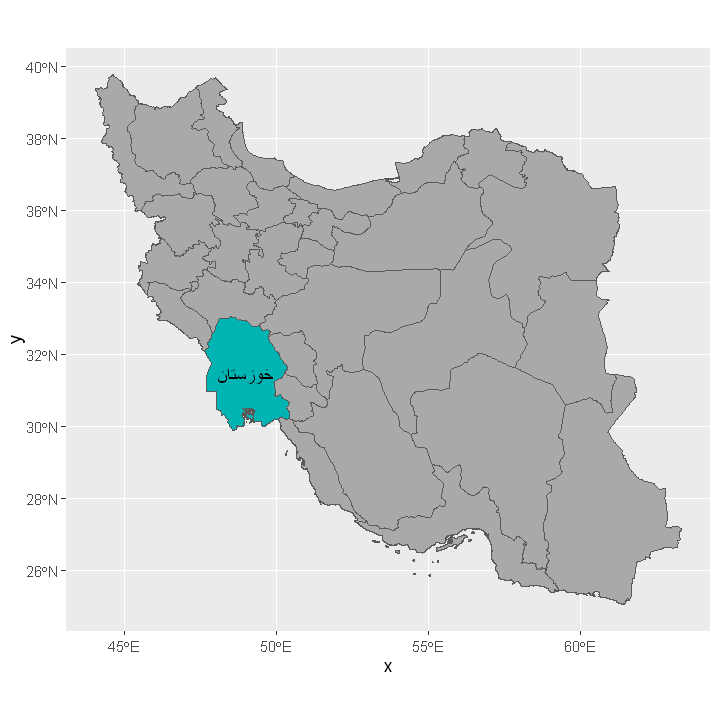

In [299]:
options(repr.plot.width = 6, repr.plot.height = 6)
sf <- st_read(dsn="E:\\Term 7\\Data Mining\\Ex1\\adm", layer="IRN_adm1")
shape <- readOGR(dsn="E:\\Term 7\\Data Mining\\Ex1\\adm", layer="IRN_adm1")

pt_centroid<-sf %>% sf::st_centroid()
pts<-st_coordinates(pt_centroid)
p<-cbind(pts,pt_centroid)

before = as.list(rep('',14))
middle = list('خوزستان')
after = as.list(rep('',16))
labels = c(before,middle,after)

before = as.list(rep('darkgrey',14))
middle = list('#00b4b4')
after = as.list(rep('darkgrey',16))
colors = c(before,middle,after)

ggplot(sf) + 
    geom_sf(data = sf, aes(fill = colors)) + 
    theme(legend.position="none")+
    geom_sf_text(aes(label = labels),size=4)

Reading layer `IRN_adm2' from data source `E:\Term 7\Data Mining\Ex1\adm' using driver `ESRI Shapefile'
Simple feature collection with 268 features and 11 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: 44.04726 ymin: 25.05875 xmax: 63.31746 ymax: 39.77722
geographic CRS: WGS 84
OGR data source with driver: ESRI Shapefile 
Source: "E:\Term 7\Data Mining\Ex1\adm", layer: "IRN_adm2"
with 268 features
It has 11 fields
Integer64 fields read as strings:  ID_0 ID_1 ID_2 


Warning message in st_centroid.sf(.):
"st_centroid assumes attributes are constant over geometries of x"Warning message in st_centroid.sfc(st_geometry(x), of_largest_polygon = of_largest_polygon):
"st_centroid does not give correct centroids for longitude/latitude data"Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
"st_point_on_surface may not give correct results for longitude/latitude data"

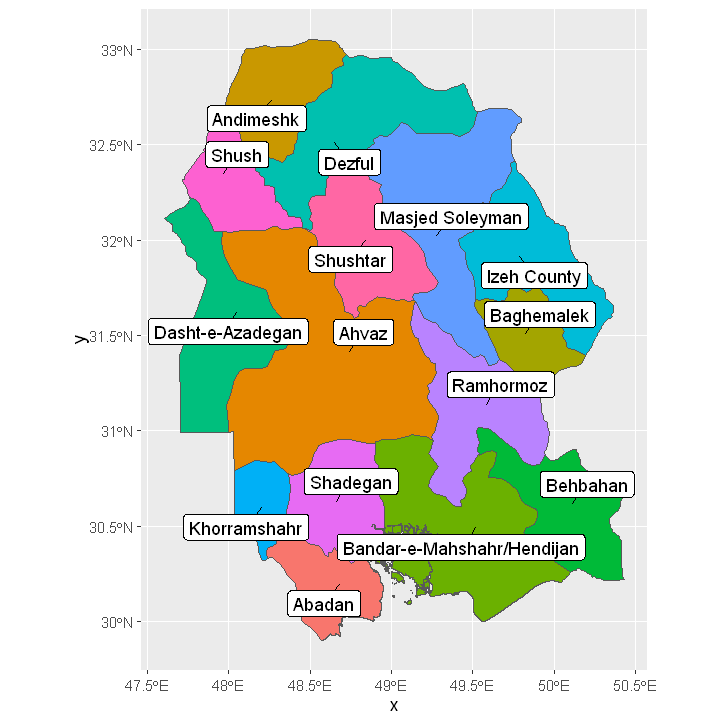

In [300]:
options(repr.plot.width = 6, repr.plot.height = 6)
sf <- st_read(dsn="E:\\Term 7\\Data Mining\\Ex1\\adm", layer="IRN_adm2")
sf = sf[sf$NAME_1 == 'Khuzestan',]
shape <- readOGR(dsn="E:\\Term 7\\Data Mining\\Ex1\\adm", layer="IRN_adm2")
shape = shape[shape@data$ID_1 == 15,]

coord = sf %>% sf::st_centroid() %>% st_coordinates(pt_centroid)

ggplot(sf) +
  geom_sf(aes(fill=NAME_2)) +
  ggrepel::geom_label_repel(
    data = sf,
    aes(label = NAME_2, geometry = geometry),
    stat = "sf_coordinates",
    min.segment.length = 0
  ) +
theme(legend.position="none")

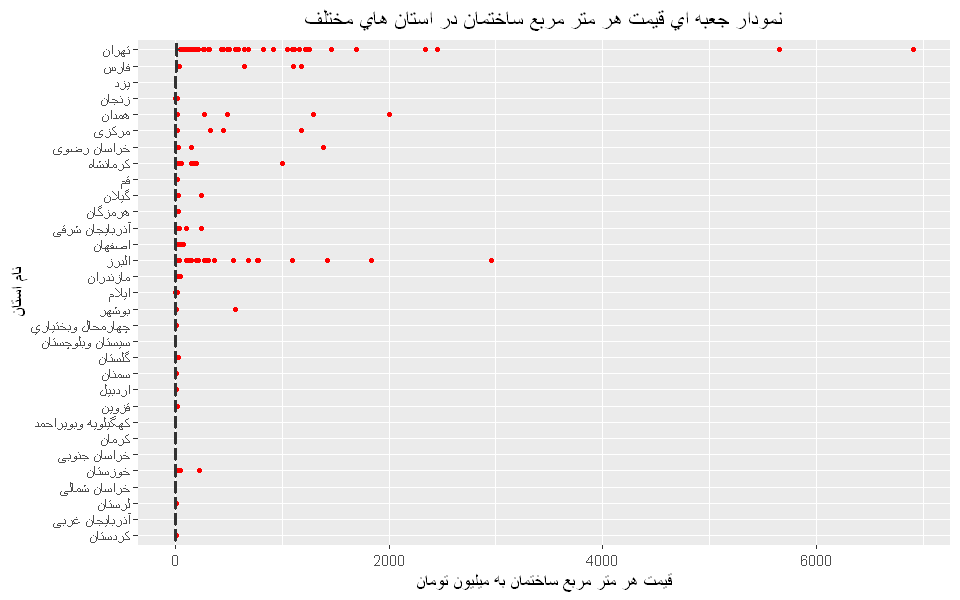

In [301]:
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(data, aes(x=price_per_square, y=reorder(state, price_per_square, FUN=median) , fill=state)) + 
    geom_boxplot(outlier.colour="red", outlier.shape=16,outlier.size=1) +
    labs(title="نمودار جعبه ای قیمت هر متر مربع ساختمان در استان های مختلف", x="قیمت هر متر مربع ساختمان به میلیون تومان", y = "نام استان") +
    theme(legend.position="none",plot.title = element_text(hjust = 0.5))

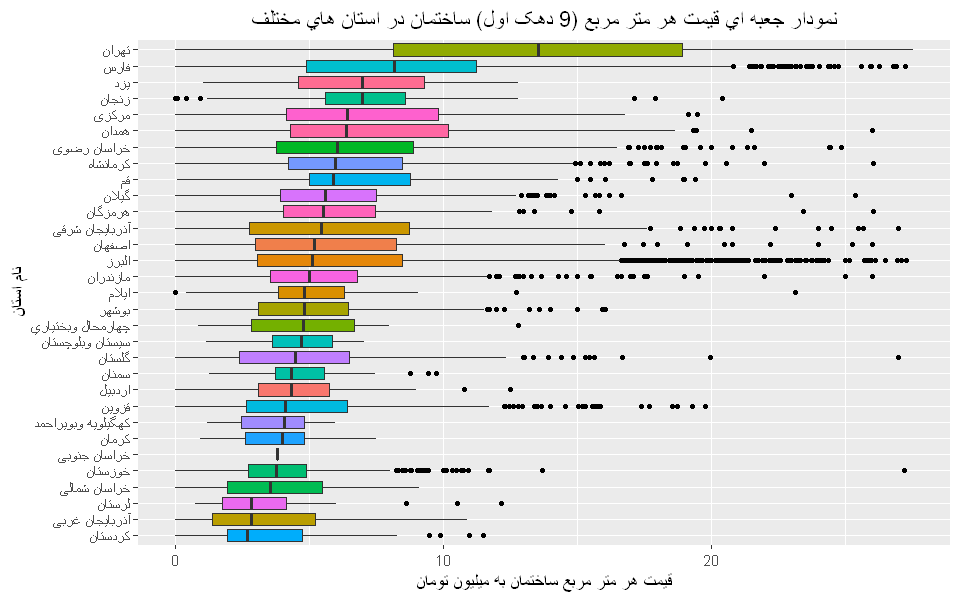

In [302]:
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(data[data$price_per_square < quantile(data$price_per_square,0.9),], 
    aes(x=price_per_square, y=reorder(state, price_per_square, FUN=median) , fill=state)) + 
    geom_boxplot(outlier.colour="black", outlier.shape=16,outlier.size=1) +
    labs(title="نمودار جعبه ای قیمت هر متر مربع (9 دهک اول) ساختمان در استان های مختلف", x="قیمت هر متر مربع ساختمان به میلیون تومان", y = "نام استان") +
    theme(legend.position="none",plot.title = element_text(hjust = 0.5))

In [303]:
head(data)

contrat_number,contract_type,state,city,property_type,district_number,usage_type,area,percentage,price,price_per_square,building_age,skeleton_type,contract_date,postal_code
19136381,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,83.00,100,300,3.614458,15,فلزي,1399/04/14,456179
19140513,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,90.00,100,108,1.200000,9,فلزي,1399/04/15,456615
19192568,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,49.00,100,1000,20.408163,10,بتوني,1399/04/23,456173
19202902,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,80.92,100,324,4.003955,9,فلزي,1399/04/24,456194
19203171,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,80.00,100,75,0.937500,10,بتوني,1399/04/24,456618
19052240,مبايعه نامه,مرکزي,اراك,دستگاه آپارتمان,NA,مسکوني,100.00,100,550,5.500000,0,بتوني,1399/04/01,381333


In [304]:
khoozestan = data[data$state == 'خوزستان',]

In [305]:
dim(khoozestan)

[1] 768  15

In [306]:
df<-khoozestan %>%
    select('city','area','building_age','skeleton_type','price','price_per_square')

In [307]:
df = dummy_cols(df, select_columns = c('city', 'skeleton_type'),remove_selected_columns = TRUE)

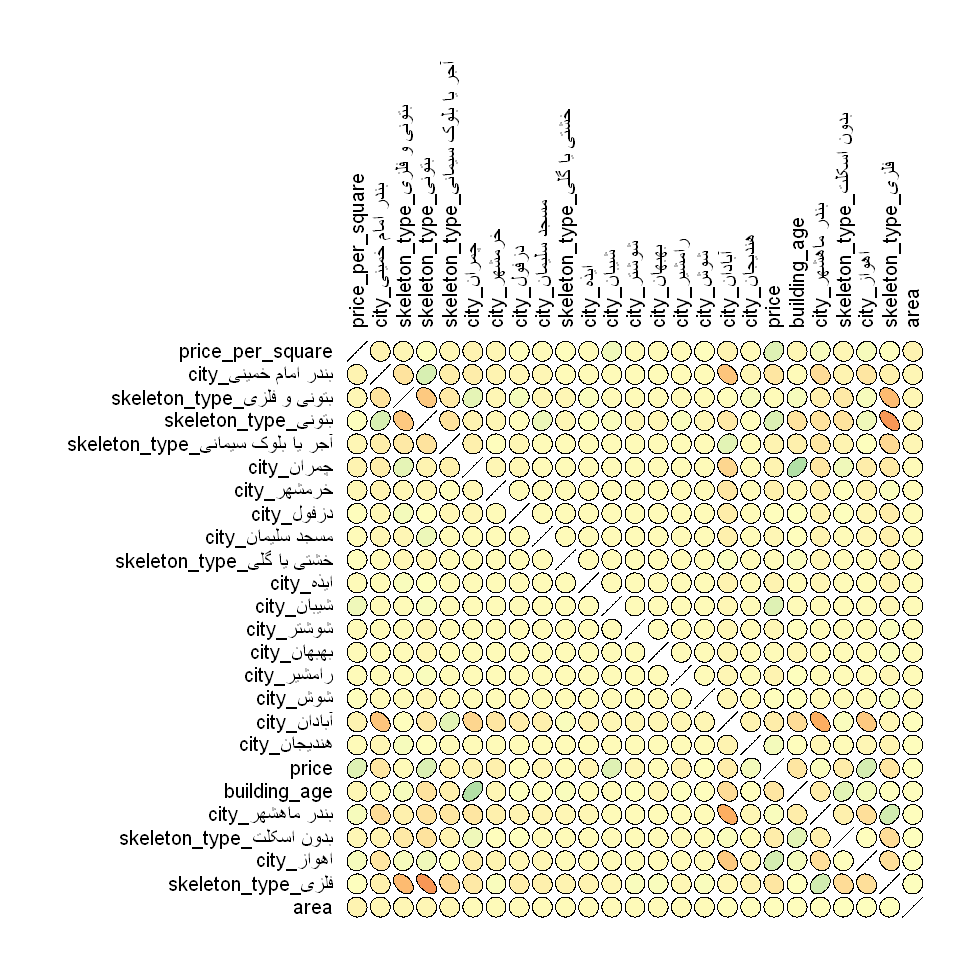

In [324]:
options(repr.plot.width = 8, repr.plot.height = 8)
data <- cor(df)
 
# Build a Pannel of 100 colors with Rcolor Brewer
my_colors <- brewer.pal(5, "Spectral")
my_colors <- colorRampPalette(my_colors)(100)
 
# Order the correlation matrix
ord <- order(data[1, ])
data_ord <- data[ord, ord]
plotcorr(data_ord , col=my_colors[data_ord*50+50] , mar=c(0,0,0,0))

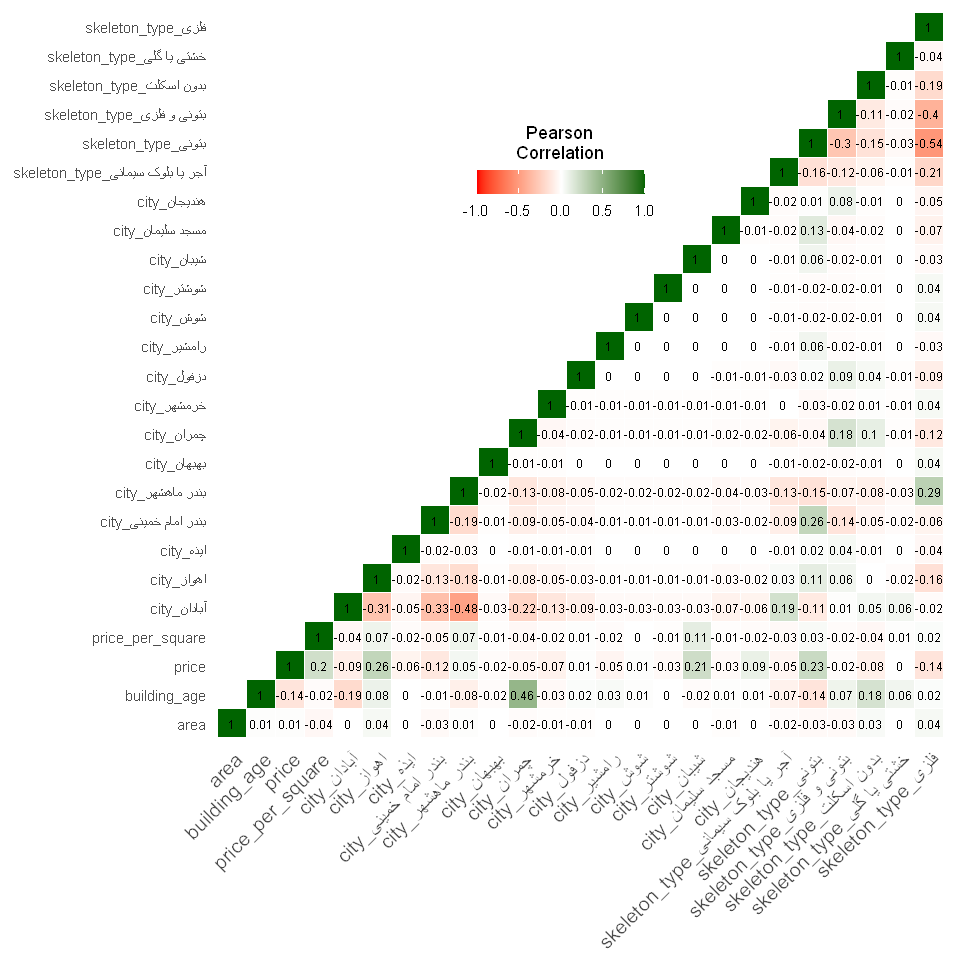

In [245]:
options(repr.plot.width = 8, repr.plot.height = 8)
cormat = round(cor(df),2)
melted_cormat <- melt(cormat)
# Get upper triangle of the correlation matrix
get_upper_tri <- function(cormat){
    cormat[lower.tri(cormat)]<- NA
    return(cormat)
  }
upper_tri <- get_upper_tri(cormat)
# Melt the correlation matrix
melted_cormat <- melt(upper_tri, na.rm = TRUE)
# Create a ggheatmap
ggheatmap <- ggplot(melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "red", high = "darkgreen", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
    name="Pearson\nCorrelation") +
  theme_minimal()+ # minimal theme
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()
# Print the heatmap
ggheatmap + geom_text(aes(Var2, Var1, label = value), color = "black", size = 2.5) +
theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.grid.major = element_blank(),
  panel.border = element_blank(),
  panel.background = element_blank(),
  axis.ticks = element_blank(),
  legend.justification = c(1, 0),
  legend.position = c(0.6, 0.7),
  legend.direction = "horizontal")+
  guides(fill = guide_colorbar(barwidth = 7, barheight = 1,
                title.position = "top", title.hjust = 0.5))

# print(ggheatmap)

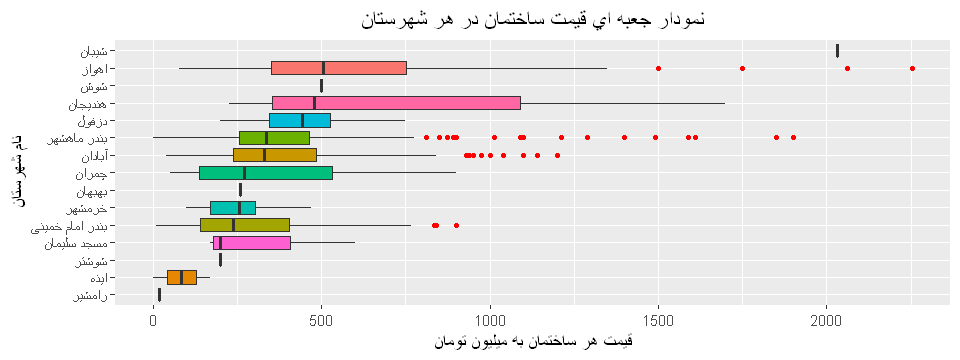

In [246]:
options(repr.plot.width = 8, repr.plot.height = 3)
ggplot(khoozestan, aes(x=price, y=reorder(city, price, FUN=median) , fill=city)) + 
    geom_boxplot(outlier.colour="red", outlier.shape=16,outlier.size=1) +
    labs(title="نمودار جعبه ای قیمت ساختمان در هر شهرستان", x="قیمت هر ساختمان به میلیون تومان", y = "نام شهرستان") +
    theme(legend.position="none", plot.title = element_text(hjust = 0.5))

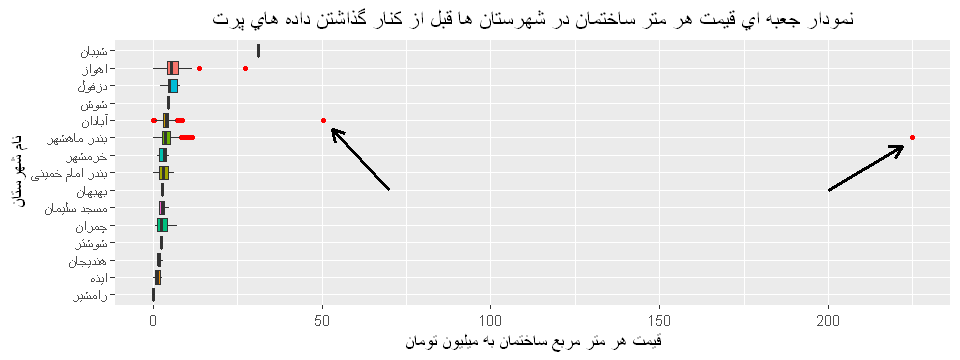

In [247]:
options(repr.plot.width = 8, repr.plot.height = 3)
ggplot(khoozestan, aes(x=price_per_square, y=reorder(city, price_per_square, FUN=median) , fill=city)) + 
geom_boxplot(outlier.colour="red", outlier.shape=16,outlier.size=1) +
labs(title="نمودار جعبه ای قیمت هر متر ساختمان در شهرستان ها قبل از کنار گذاشتن داده های پرت", x="قیمت هر متر مربع ساختمان به میلیون تومان", y = "نام شهرستان") +
geom_segment(aes(x = 200, y = 7, xend = 222, yend = 9.5),size = 1,arrow = arrow(length = unit(.3, "cm"))) +
geom_segment(aes(x = 70, y = 7, xend = 53, yend = 10.5),size = 1,arrow = arrow(length = unit(.3, "cm"))) +
theme(legend.position="none",plot.title = element_text(hjust = 0.5))

In [248]:
#Putting aside Outliers

In [249]:
tail(khoozestan[khoozestan$city == 'بندر ماهشهر',][order(khoozestan[khoozestan$city == 'بندر ماهشهر',]$price_per_square),])

contrat_number,contract_type,state,city,property_type,district_number,usage_type,area,percentage,price,price_per_square,building_age,skeleton_type,contract_date,postal_code
19062589,مبايعه نامه,خوزستان,بندر ماهشهر,دستگاه آپارتمان,NA,مسکوني,158.38,100,1590,10.03915,9,بتوني,1399/04/02,635171
19114851,مبايعه نامه,خوزستان,بندر ماهشهر,دستگاه آپارتمان,2,مسکوني,147.00,100,1490,10.13605,0,فلزي,1399/04/10,635190
19219922,مبايعه نامه,خوزستان,بندر ماهشهر,دستگاه آپارتمان,NA,مسکوني,112.65,100,1212,10.75899,2,فلزي,1399/04/28,635162
19138717,مبايعه نامه,خوزستان,بندر ماهشهر,دستگاه آپارتمان,NA,مسکوني,99.55,100,1090,10.94927,0,بتوني,1399/04/15,635165
19211408,مبايعه نامه,خوزستان,بندر ماهشهر,دستگاه آپارتمان,NA,مسکوني,158.38,100,1850,11.68077,1,بتوني,1399/04/25,635160
19189198,مبايعه نامه,خوزستان,بندر ماهشهر,دستگاه آپارتمان,NA,مسکوني,1.00,100,225,225.00000,9,فلزي,1399/04/22,635111


In [250]:
# 19189198

In [251]:
khoozestan = khoozestan[khoozestan$contrat_number != 19189198,]

In [252]:
tail(khoozestan[khoozestan$city == 'آبادان',][order(khoozestan[khoozestan$city == 'آبادان',]$price_per_square),])

contrat_number,contract_type,state,city,property_type,district_number,usage_type,area,percentage,price,price_per_square,building_age,skeleton_type,contract_date,postal_code
19098290,مبايعه نامه,خوزستان,آبادان,دستگاه آپارتمان,NA,مسکوني,72.80,100,560.0,7.692308,26,خشتي يا گلي,1399/04/08,631878
19137065,مبايعه نامه,خوزستان,آبادان,دستگاه آپارتمان,1,مسکوني,95.00,100,752.6,7.922105,0,بتوني و فلزي,1399/04/14,631688
19121319,مبايعه نامه,خوزستان,آبادان,دستگاه آپارتمان,NA,مسکوني,130.00,100,1040.0,8.000000,1,بتوني,1399/04/11,631687
19136908,مبايعه نامه,خوزستان,آبادان,دستگاه آپارتمان,NA,مسکوني,73.23,100,630.0,8.603032,4,بتوني و فلزي,1399/04/14,631586
19188748,مبايعه نامه,خوزستان,آبادان,دستگاه آپارتمان,NA,مسکوني,73.77,100,650.0,8.811170,8,فلزي,1399/04/22,631481
19236303,مبايعه نامه,خوزستان,آبادان,دستگاه آپارتمان,2,مسکوني,10.16,100,513.0,50.492126,2,فلزي,1399/04/30,631472


In [253]:
# 19236303

In [254]:
khoozestan = khoozestan[khoozestan$contrat_number != 19236303,]

In [255]:
#Done

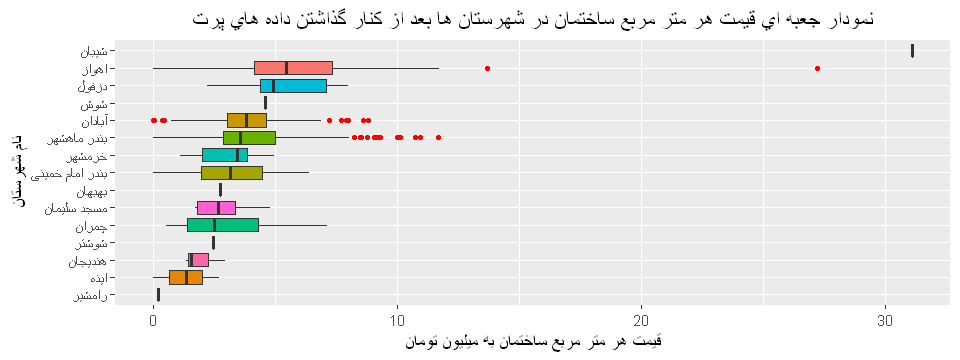

In [256]:
options(repr.plot.width = 8, repr.plot.height = 3)
ggplot(khoozestan, aes(x=price_per_square, y=reorder(city, price_per_square, FUN=median) , fill=city)) + 
geom_boxplot(outlier.colour="red", outlier.shape=16,outlier.size=1) +
labs(title="نمودار جعبه ای قیمت هر متر مربع ساختمان در شهرستان ها بعد از کنار گذاشتن داده های پرت", x="قیمت هر متر مربع ساختمان به میلیون تومان", y = "نام شهرستان") +
theme(legend.position="none",plot.title = element_text(hjust = 0.5))

In [257]:
confidence_level <- khoozestan %>%
    select(city) %>%
    group_by(city) %>%
    count() %>%
    arrange(n)

In [258]:
confidence_level

city,n
بهبهان,1
رامشير,1
شوش,1
شوشتر,1
شيبان,1
ايذه,2
هنديجان,3
مسجد سليمان,5
دزفول,8
خرمشهر,16


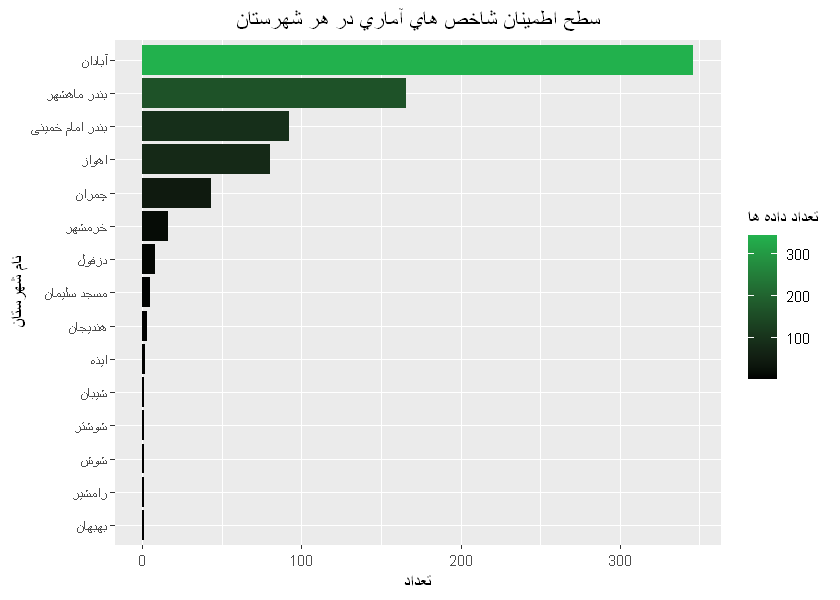

In [259]:
options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(confidence_level , aes(x=n , y=reorder(city,n), fill = n)) + 
    geom_bar(stat = "identity") + 
    labs(title="سطح اطمینان شاخص های آماری در هر شهرستان", x="تعداد", y = "نام شهرستان") +
    scale_fill_gradient(name = "تعداد داده ها",low="black", high="#22b14d") +
    theme(plot.title = element_text(hjust = 0.5))

In [260]:
khoozestan = khoozestan[!khoozestan$city %in% list('بهبهان','رامشير','شوش','شيبان','ايذه','هنديجان','مسجد سليمان','دزفول','شوشتر'),]

In [261]:
confidence_level <- khoozestan %>%
    select(city) %>%
    group_by(city) %>%
    count() %>%
    arrange(n)

In [262]:
confidence_level

city,n
خرمشهر,16
چمران,43
اهواز,80
بندر امام خميني,92
بندر ماهشهر,166
آبادان,346


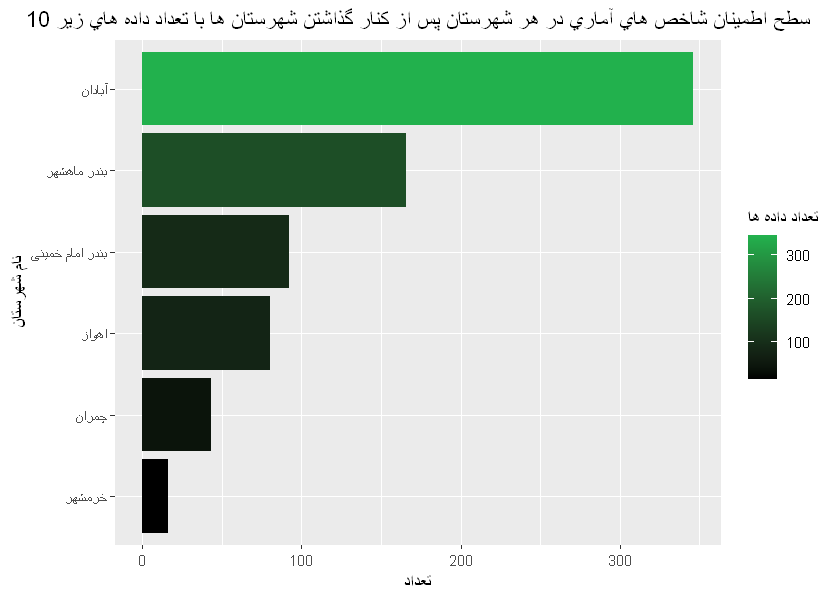

In [263]:
options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(confidence_level , aes(x=n , y=reorder(city,n), fill = n)) + 
    geom_bar(stat = "identity") + 
    labs(title="سطح اطمینان شاخص های آماری در هر شهرستان پس از کنار گذاشتن شهرستان ها با تعداد داده های زیر 10", x="تعداد", y = "نام شهرستان") +
    scale_fill_gradient(name = "تعداد داده ها",low="black", high="#22b14d") +
    theme(plot.title = element_text(hjust = 0.5))

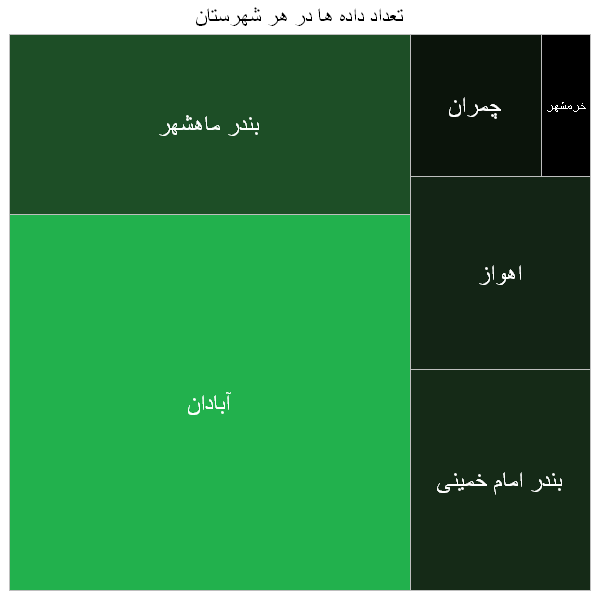

In [264]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(confidence_level, aes(area = n, fill = n,label = city)) +
    geom_treemap() +
    geom_treemap_text(colour = "white",size = 15, place = "centre",grow = FALSE) +
    labs(title="تعداد داده ها در هر شهرستان") +
    scale_fill_gradient(name = "تعداد داده ها",low="black", high="#22b14d") +
    theme(legend.position="none",plot.title = element_text(hjust = 0.5))

In [265]:
df <- khoozestan %>%
    select(city,price) %>%
    group_by(city) %>%
    summarise(mean_price = mean(price))
df

`summarise()` ungrouping output (override with `.groups` argument)


city,mean_price
اهواز,623.4250
آبادان,378.0111
بندر امام خميني,309.6426
بندر ماهشهر,431.9117
چمران,344.5581
خرمشهر,259.9812


In [266]:
reorder(df$city,df$mean_price)

[1] اهواز           آبادان          بندر امام خميني بندر ماهشهر    
[5] چمران           خرمشهر         
attr(,"scores")
          اهواز          آبادان بندر امام خميني     بندر ماهشهر           چمران 
       623.4250        378.0111        309.6426        431.9117        344.5581 
         خرمشهر 
       259.9812 
Levels: خرمشهر بندر امام خميني چمران آبادان بندر ماهشهر اهواز

In [267]:
# reorder(df$city , df$mean_price)

In [268]:
# confidence_level

In [269]:
# confidence_level[match(reorder(df$city , df$mean_price), confidence_level$city),]$n
# df[match(target, df$name),]

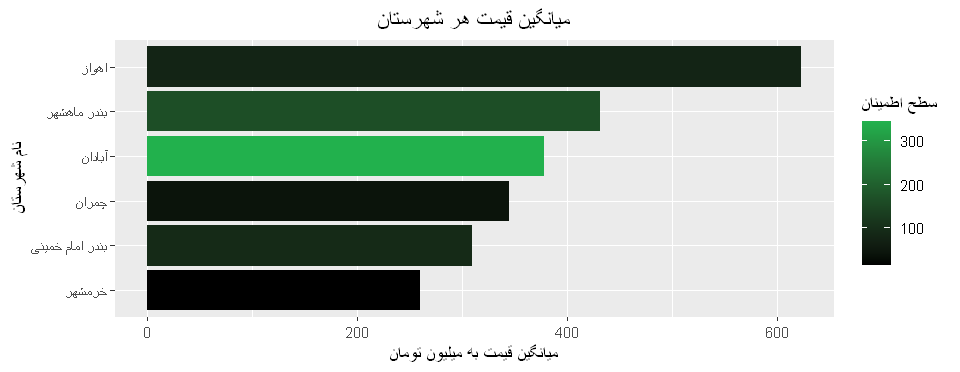

In [64]:
options(repr.plot.width = 8, repr.plot.height = 3.1)
confidence = confidence_level[match(reorder(df$city , df$mean_price), confidence_level$city),]$n
ggplot(df , aes(x=mean_price , y=reorder(city,mean_price),fill = confidence)) + 
    geom_bar(stat = "identity") + 
    labs(title="میانگین قیمت هر شهرستان", x="میانگین قیمت به میلیون تومان", y = "نام شهرستان") +
    scale_fill_gradient(name='سطح اطمینان',low="black", high="#22b14d") +
    theme(plot.title = element_text(hjust = 0.5))

In [65]:
df <- khoozestan %>%
    select(city,price_per_square) %>%
    group_by(city) %>%
    summarise(mean_price_per_square = mean(price_per_square))
df

`summarise()` ungrouping output (override with `.groups` argument)


city,mean_price_per_square
اهواز,6.002169
آبادان,3.839624
بندر امام خميني,3.195575
بندر ماهشهر,4.127006
چمران,2.949167
خرمشهر,3.095103


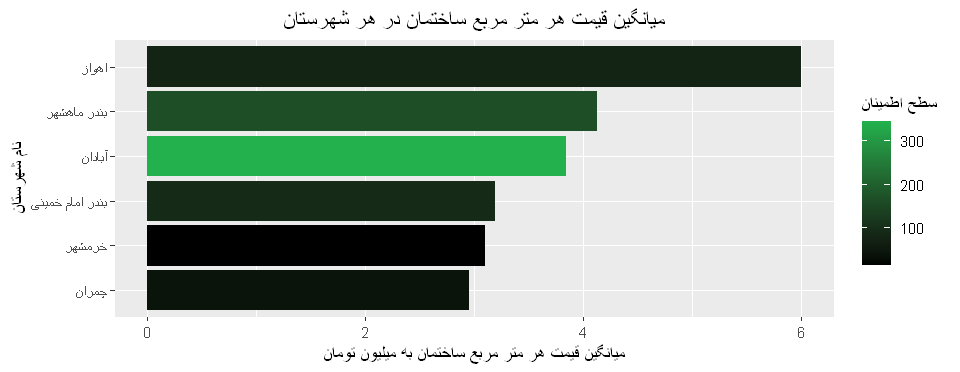

In [66]:
options(repr.plot.width = 8, repr.plot.height = 3.1)
confidence = confidence_level[match(reorder(df$city , df$mean_price_per_square), confidence_level$city),]$n
ggplot(df , aes(x=mean_price_per_square , y=reorder(city,mean_price_per_square),fill = confidence)) + 
    geom_bar(stat = "identity") + 
    labs(title="میانگین قیمت هر متر مربع ساختمان در هر شهرستان", x="میانگین قیمت هر متر مربع ساختمان به میلیون تومان", y = "نام شهرستان") +
    scale_fill_gradient(name='سطح اطمینان',low="black", high="#22b14d") +
    theme(plot.title = element_text(hjust = 0.5))

Picking joint bandwidth of 0.619


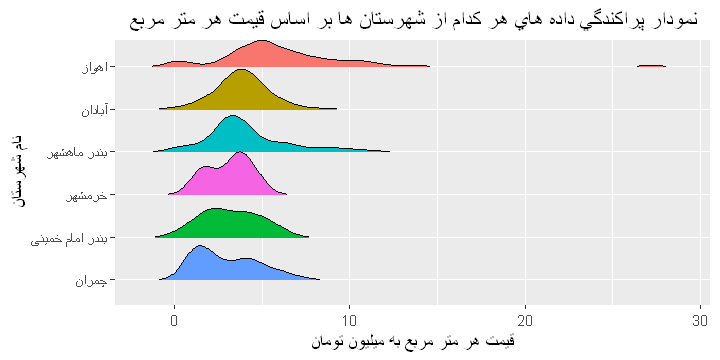

In [62]:
options(repr.plot.width = 6, repr.plot.height = 3)
ggplot(khoozestan, aes(x = price_per_square, y = reorder(city, price_per_square, FUN=median), fill = city)) +
  geom_density_ridges_gradient(scale = 1, rel_min_height = 0.01) +
    labs(title="نمودار پراکندگی داده های هر کدام از شهرستان ها بر اساس قیمت هر متر مربع", x="قیمت هر متر مربع به میلیون تومان", y = "نام شهرستان") +
    theme(legend.position="none",plot.title = element_text(hjust = 0.5))

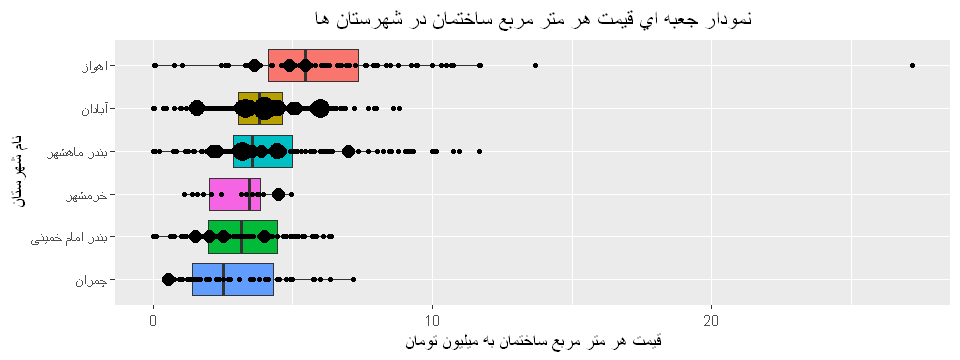

In [67]:
options(repr.plot.width = 8, repr.plot.height = 3)
ggplot(khoozestan, aes(x=price_per_square, y=reorder(city, price_per_square, FUN=median) , fill=city)) + 
    geom_boxplot(outlier.colour="red", outlier.shape=16,outlier.size=1) +
    geom_count(col="black", show.legend=F)+
    labs(title="نمودار جعبه ای قیمت هر متر مربع ساختمان در شهرستان ها", x="قیمت هر متر مربع ساختمان به میلیون تومان", y = "نام شهرستان") +
    theme(legend.position="none",plot.title = element_text(hjust = 0.5))

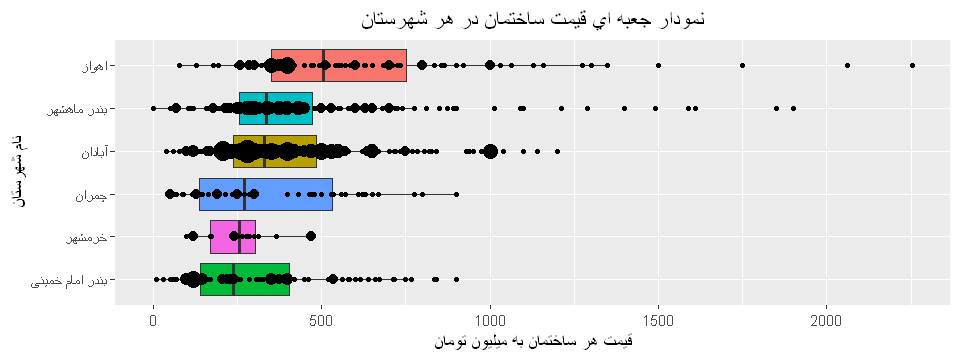

In [68]:
options(repr.plot.width = 8, repr.plot.height = 3)
ggplot(khoozestan, aes(x=price, y=reorder(city, price, FUN=median) , fill=city)) + 
    geom_boxplot(outlier.colour="red", outlier.shape=16,outlier.size=1) +
    geom_count(col="black", show.legend=F)+
    labs(title="نمودار جعبه ای قیمت ساختمان در هر شهرستان", x="قیمت هر ساختمان به میلیون تومان", y = "نام شهرستان") +
    theme(legend.position="none",plot.title = element_text(hjust = 0.5))

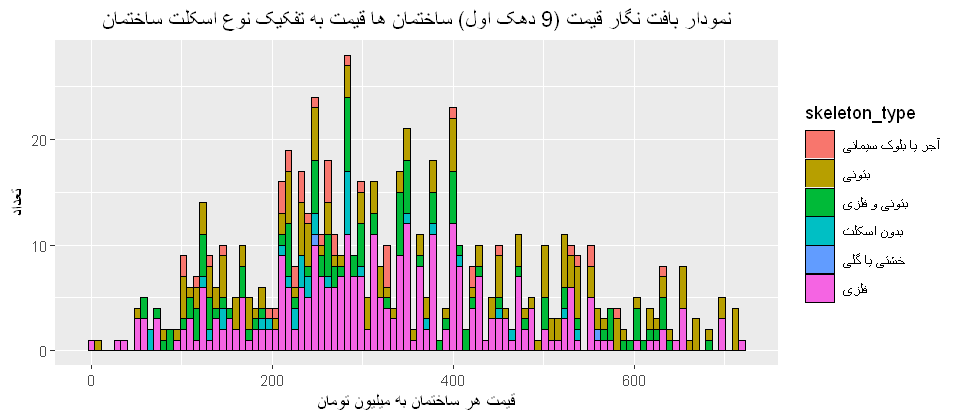

In [287]:
options(repr.plot.width = 8, repr.plot.height = 3.5)
ggplot(khoozestan[khoozestan$price < quantile(khoozestan$price,0.9),], aes(price)) + 
#     geom_histogram(aes(fill=skeleton_type), binwidth = 100,col='black', size=.1) +
    geom_histogram(aes(fill=skeleton_type), bins=100, col="black", size=.1) +
    labs(title="نمودار بافت نگار قیمت (9 دهک اول) ساختمان ها قیمت به تفکیک نوع اسکلت ساختمان", x="قیمت هر ساختمان به میلیون تومان", y = "تعداد")+
    theme(plot.title = element_text(hjust = 0.5))

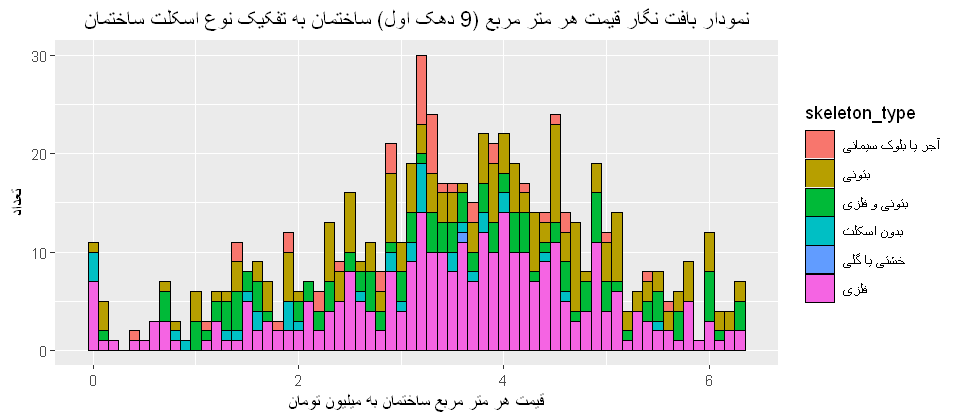

In [288]:
options(repr.plot.width = 8, repr.plot.height = 3.5)
ggplot(khoozestan[khoozestan$price_per_square < quantile(khoozestan$price_per_square,0.9),], aes(price_per_square)) + 
    geom_histogram(aes(fill=skeleton_type), binwidth = 0.1,col='black', size=.1) +
#     geom_histogram(aes(fill=skeleton_type), bins=100, col="black", size=.1) +
    labs(title="نمودار بافت نگار قیمت هر متر مربع (9 دهک اول) ساختمان به تفکیک نوع اسکلت ساختمان", x="قیمت هر متر مربع ساختمان به میلیون تومان", y = "تعداد")+
    theme(plot.title = element_text(hjust = 0.5))

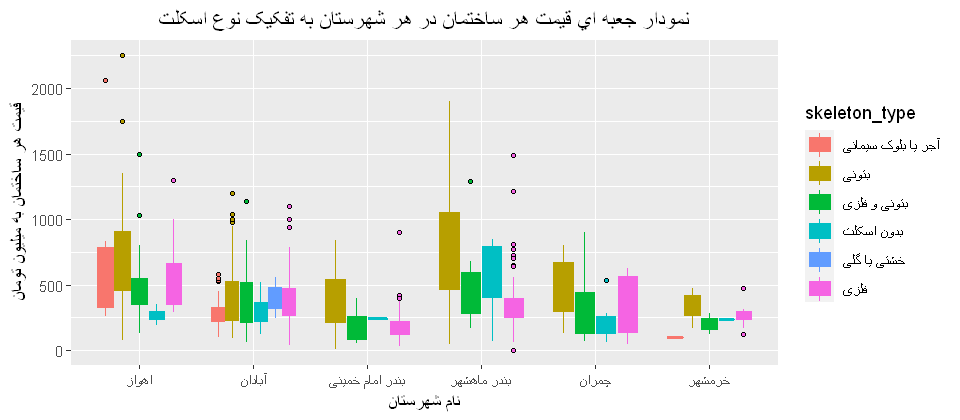

In [80]:
options(repr.plot.width = 8, repr.plot.height = 3.5)
ggplot(khoozestan, aes(x=city, y=price , fill = skeleton_type)) + 
    geom_boxplot(aes(colour = skeleton_type) ,outlier.colour="black", outlier.shape=21,outlier.size=1) +
    labs(title="نمودار جعبه ای قیمت هر ساختمان در هر شهرستان به تفکیک نوع اسکلت", y="قیمت هر ساختمان به میلیون تومان", x = "نام شهرستان") +
    theme(plot.title = element_text(hjust = 0.5))

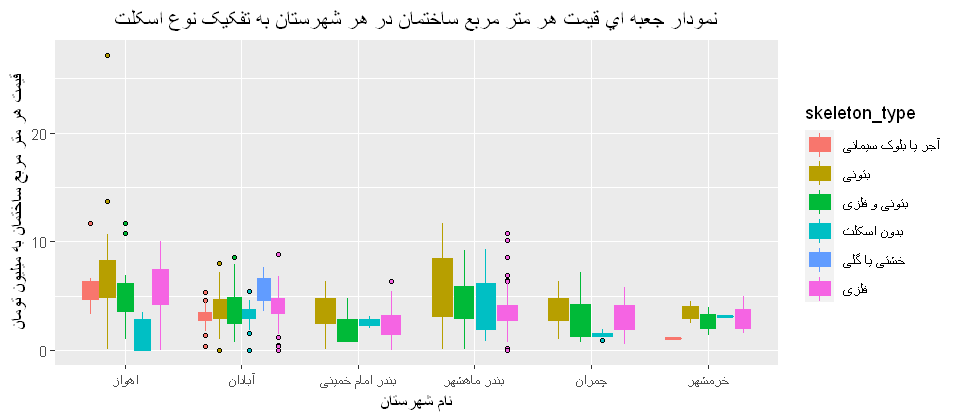

In [79]:
options(repr.plot.width = 8, repr.plot.height = 3.5)
ggplot(khoozestan, aes(x=city, y=price_per_square , fill = skeleton_type)) + 
    geom_boxplot(aes(colour = skeleton_type) ,outlier.colour="black", outlier.shape=21,outlier.size=1) +
    labs(title="نمودار جعبه ای قیمت هر متر مربع ساختمان در هر شهرستان به تفکیک نوع اسکلت", y="قیمت هر متر مربع ساختمان به میلیون تومان", x = "نام شهرستان") +
    theme(plot.title = element_text(hjust = 0.5))

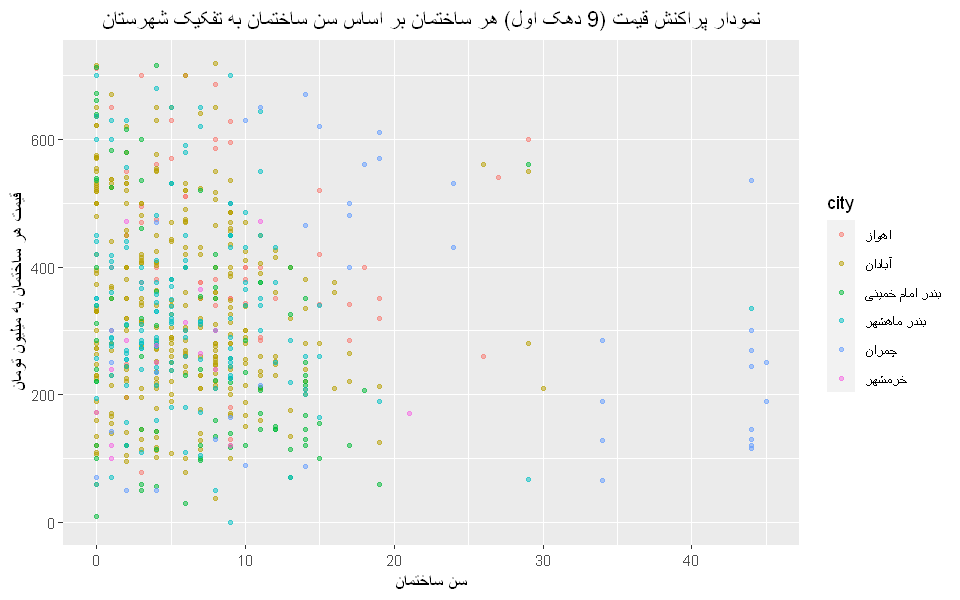

In [88]:
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(khoozestan[khoozestan$price < quantile(khoozestan$price,0.9),], aes(x=building_age, y=price , color = city)) + 
    geom_point(size=1,alpha=0.5) +
    labs(title="نمودار پراکنش قیمت (9 دهک اول) هر ساختمان بر اساس سن ساختمان به تفکیک شهرستان", x="سن ساختمان", y = "قیمت هر ساختمان به میلیون تومان") +
    theme(plot.title = element_text(hjust = 0.5))

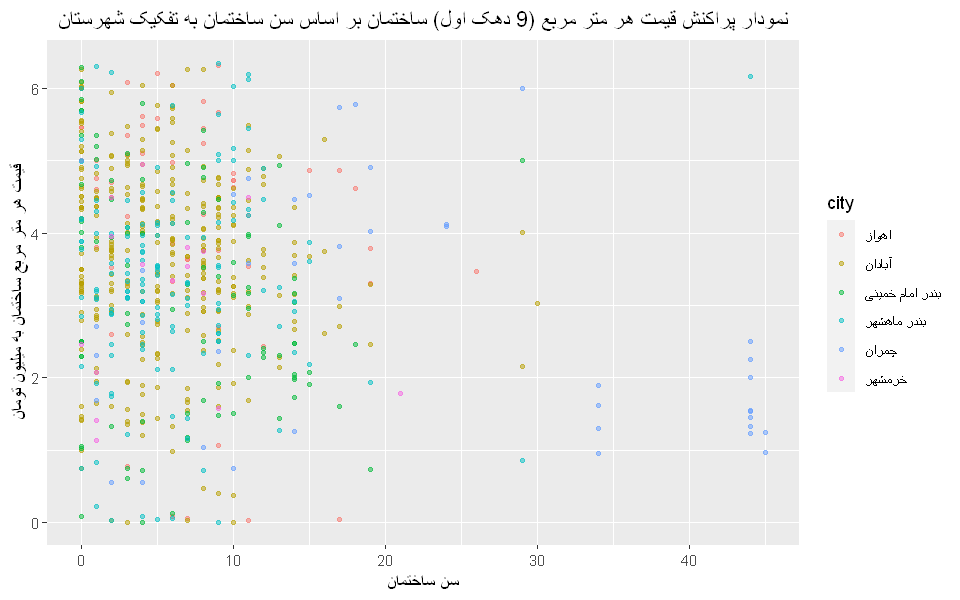

In [90]:
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(khoozestan[khoozestan$price_per_square < quantile(khoozestan$price_per_square,0.9),], 
    aes(x=building_age, y=price_per_square , color = city)) + 
    geom_point(size=1,alpha=0.5) +
    labs(title="نمودار پراکنش قیمت هر متر مربع (9 دهک اول) ساختمان بر اساس سن ساختمان به تفکیک شهرستان", 
    x="سن ساختمان", y ="قیمت هر متر مربع ساختمان به میلیون تومان") +
    theme(plot.title = element_text(hjust = 0.5))

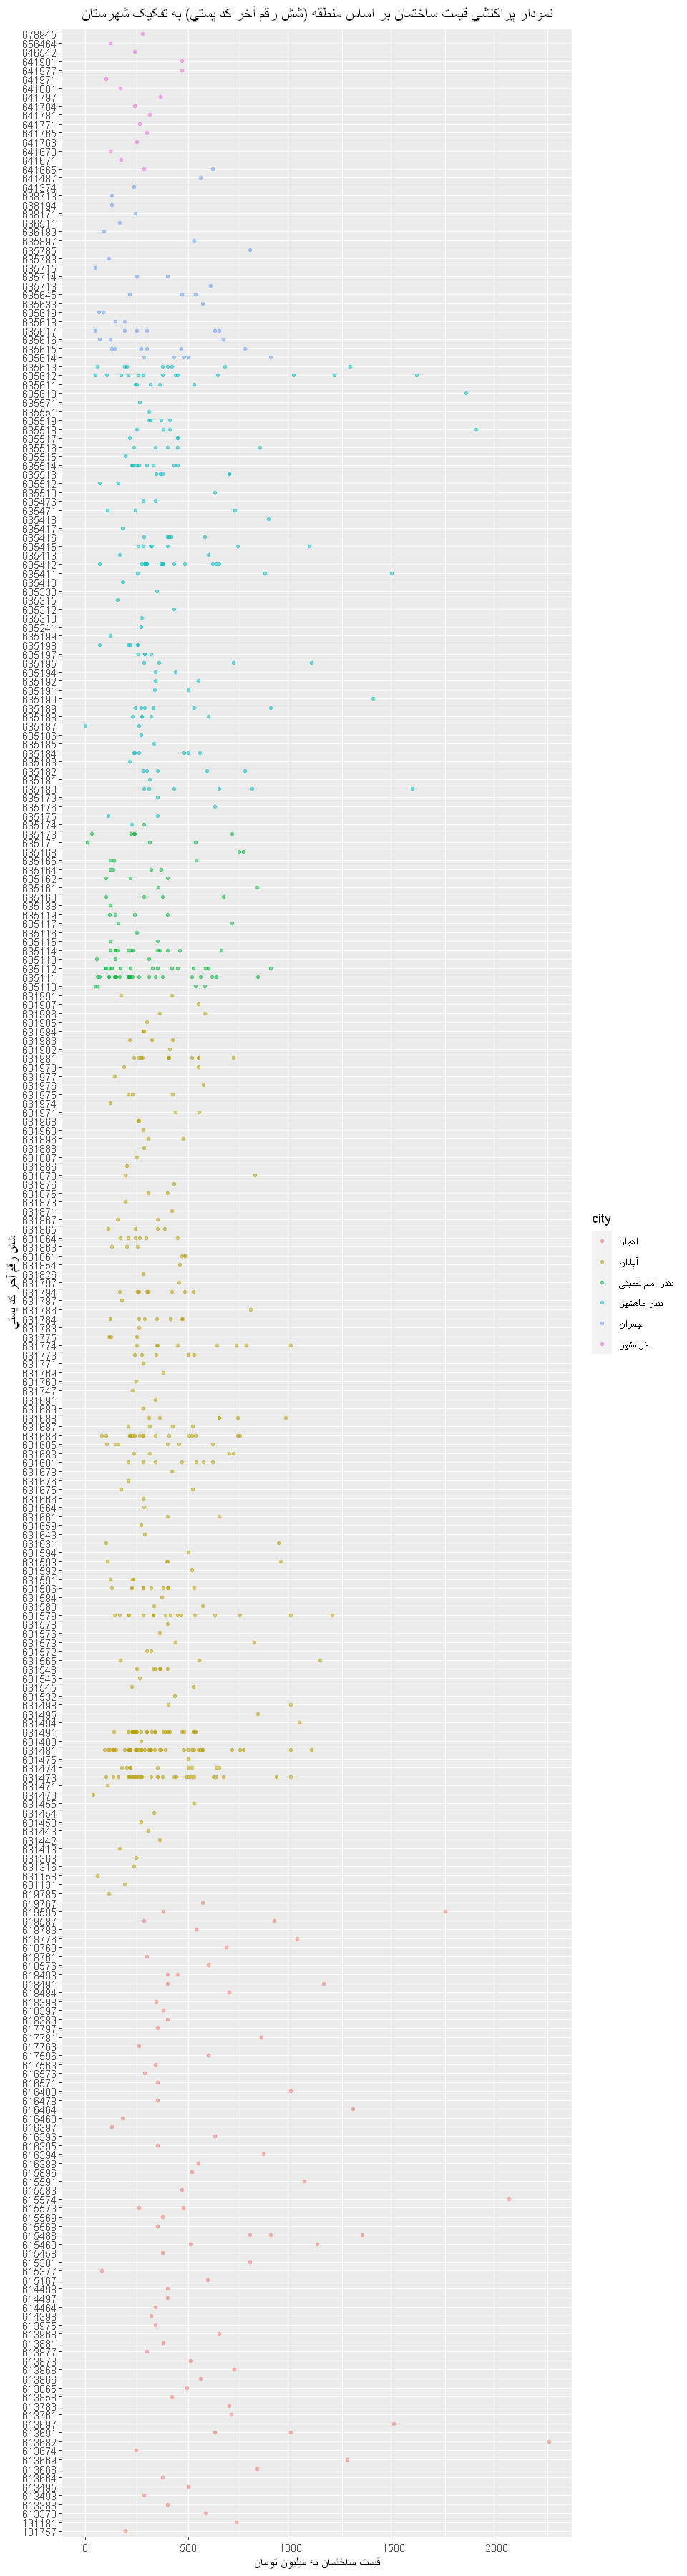

In [75]:
options(repr.plot.width = 8, repr.plot.height = 30)
ggplot(khoozestan, aes(x=price, y=postal_code[order(postal_code)] , color = city)) + 
    geom_point(size=1,alpha=0.5) +
    labs(title="نمودار پراکنشی قیمت ساختمان بر اساس منطقه (شش رقم آخر کد پستی) به تفکیک شهرستان", y="شش رقم آخر کد پستی", x = "قیمت ساختمان به میلیون تومان")+
    theme(plot.title = element_text(hjust = 0.5))

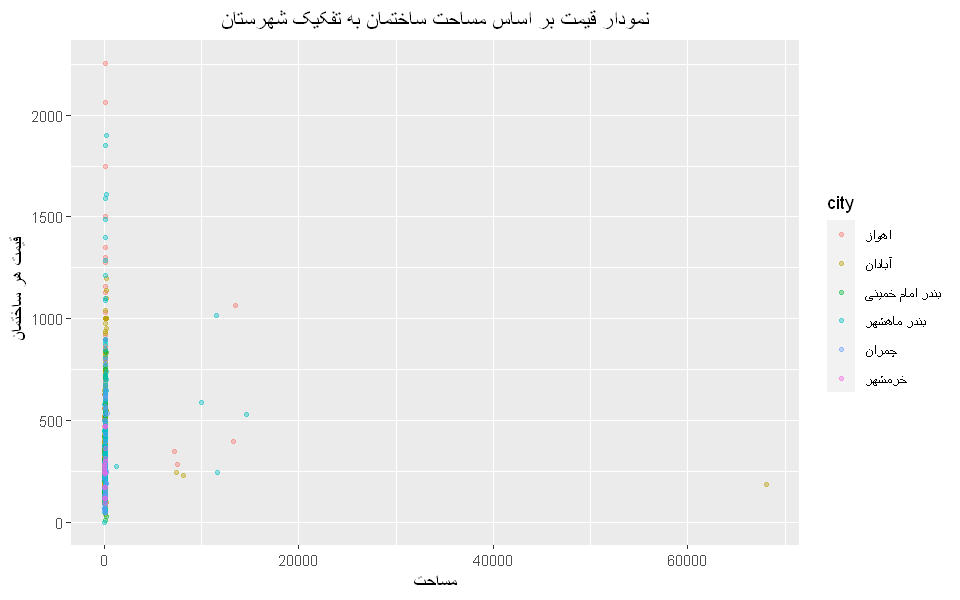

In [95]:
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(khoozestan, aes(x=area, y=price , color = city)) +
    geom_point(size=1,alpha=0.4,) +
    labs(title="نمودار قیمت بر اساس مساحت ساختمان به تفکیک شهرستان", y=" قیمت هر ساختمان", x = "مساحت")+
    theme(plot.title = element_text(hjust = 0.5))

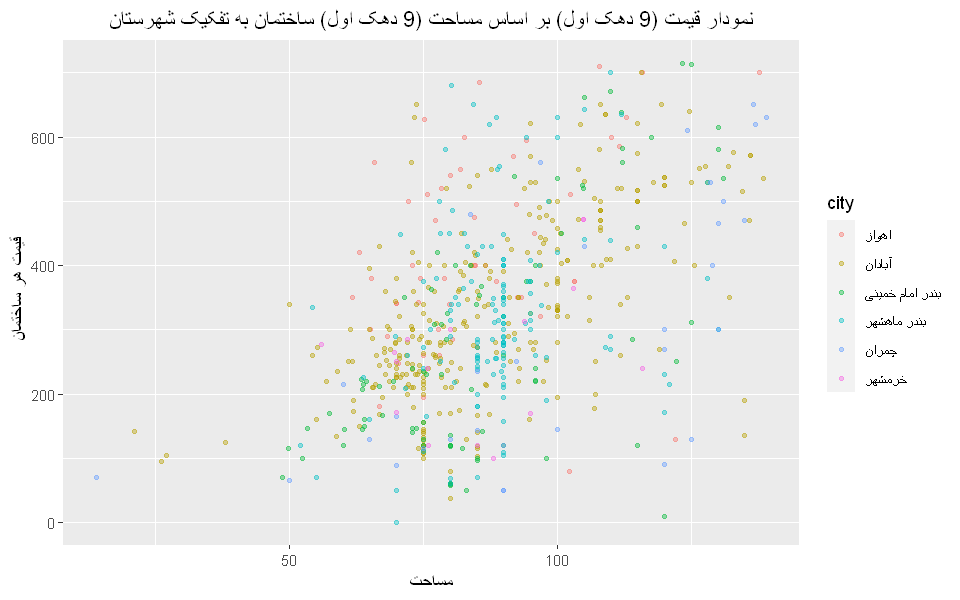

In [96]:
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(khoozestan[(khoozestan$area < quantile(khoozestan$area,0.90))&(khoozestan$price < quantile(khoozestan$price,0.9)),], 
    aes(y=price, x=area , color = city)) +
    geom_point(size=1,alpha=0.4,) +
    labs(title="نمودار قیمت (9 دهک اول) بر اساس مساحت (9 دهک اول) ساختمان به تفکیک شهرستان", y=" قیمت هر ساختمان", x = "مساحت")+
    theme(plot.title = element_text(hjust = 0.5))

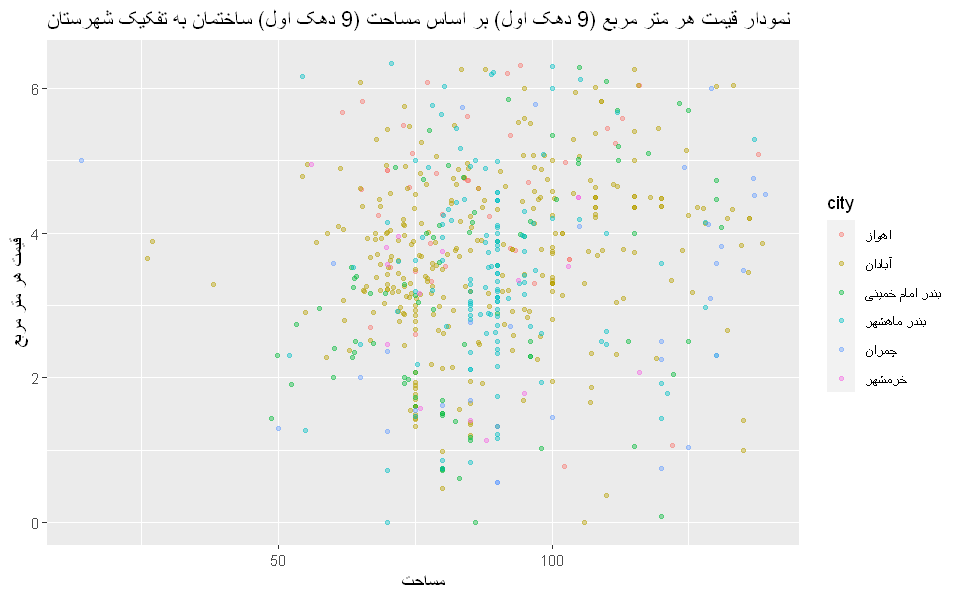

In [97]:
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(khoozestan[(khoozestan$area < quantile(khoozestan$area,0.90))&
    (khoozestan$price_per_square < quantile(khoozestan$price_per_square,0.9)),], 
    aes(y=price_per_square, x=area , color = city)) +
    geom_point(size=1,alpha=0.4,) +
    labs(title="نمودار قیمت هر متر مربع (9 دهک اول) بر اساس مساحت (9 دهک اول) ساختمان به تفکیک شهرستان", y="قیمت هر متر مربع", x = "مساحت")